In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('flights_cleaned.csv', index_col=[0])

In [6]:
df.head()

,mkt_unique_carrier,origin,dest,distance,fl_day,week_num,dep_time_of_day,arr_time_of_day,arr_delay,delay_binary
0,DL,FLL,ATL,581.0,Sunday,2,evening,evening,-8.0,0.0
1,AA,DCA,DFW,1192.0,Monday,3,morning,morning,75.0,1.0
2,AA,ORD,IND,177.0,Thursday,2,afternoon,afternoon,-7.0,0.0
3,UA,PIT,SFO,2254.0,Friday,2,afternoon,evening,-7.0,0.0
4,DL,MSP,GFK,284.0,Thursday,1,evening,overnight,-15.0,0.0


In [16]:
df['week_num'] = df.week_num.astype('object')

In [17]:
df.dtypes

mkt_unique_carrier     object
origin                 object
dest                   object
distance              float64
fl_day                 object
week_num               object
dep_time_of_day        object
arr_time_of_day        object
arr_delay             float64
delay_binary          float64
dtype: object

In [22]:
df2 = pd.get_dummies(df)

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [25]:
X = df2.drop(columns=['arr_delay','delay_binary'])

In [26]:
y = df2['delay_binary']

In [41]:
num_col = ['distance']
cat_cols = list(X.iloc[:,1:].columns)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [51]:
X_numeric_scaled = scaler.fit_transform(df2[num_col])

In [52]:
X_categorical = df2[cat_cols].to_numpy()

In [53]:
X_arr = np.hstack((X_categorical, X_numeric_scaled))

In [54]:
X_arr.shape

(49133, 737)

In [55]:
y.shape

(49133,)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=15, stratify=y)

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=400)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [61]:
y_pred = lr.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

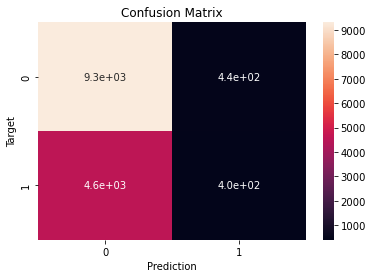

In [62]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [63]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 65.94%


In [ ]:
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled)) #combines the two into one array
    y = df['target']
    return X, y

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)